**Preprocess the dataset by tokenizing the text data, removing stopwords, converting it to numerical representations, and splitting it into training, validation, and test sets.(2 Marks)**

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/AsimKarel/datasets/main/course_data_clean.csv'
df = pd.read_csv(url)
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0


In [2]:
df['course_rating'].unique()

array(['liked course', 'disliked course', nan], dtype=object)

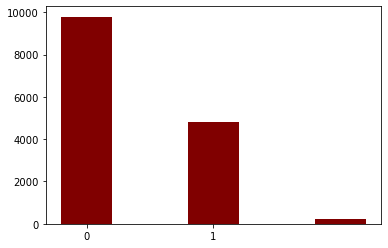

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(range(len(df['course_rating'].unique())), [df['course_rating'].value_counts()['liked course'],
                                                   df['course_rating'].value_counts()['disliked course'],
                                                   df['course_rating'].isna().sum()], color ='maroon',
        width = 0.4)

plt.xticks(np.arange(0,2,1))
plt.show()

In [4]:
df_positive = df[df['course_rating'] == 'liked course'].head(5000)
df_negative = df[df['course_rating'] == 'disliked course'].head(5000)
df_small = pd.concat([df_positive, df_negative])
df_small.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0
5,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I recommend finding a course with a language t...,liked course,1.0
6,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,"I really enjoyed this course online, being co-...",liked course,1.0


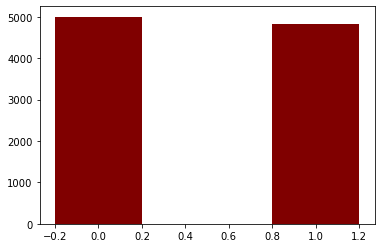

In [5]:
plt.bar(range(len(df_small['course_rating'].unique())), [df_small['course_rating'].value_counts()['liked course'],
                                                   df_small['course_rating'].value_counts()['disliked course']], color ='maroon',
        width = 0.4)
plt.show()

In [6]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df_small['reviews'] = df_small['reviews'].astype('string')
df_small['reviews'].dtypes

string[python]

In [8]:
df_small['reviews_without_stopwords'] = df_small['reviews'].apply(lambda x: ' '.join([word for word in (str(x)).split() if word not in (stop)]))
df_small['reviews_without_stopwords'].head()

0                             go office hours practice
3    Took 2018 programming experience ever. Started...
4    I loved everything cs 115. Great instructors, ...
5    I recommend finding course language actually u...
6    I really enjoyed course online, co-taught 4 pr...
Name: reviews_without_stopwords, dtype: object

In [9]:
from gensim.utils import simple_preprocess
df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df_small['reviews_without_stopwords']]
df_small['tokenized_text'].head()

0                        [go, office, hours, practice]
3    [took, programming, experience, ever, started,...
4    [loved, everything, cs, great, instructors, fa...
5    [recommend, finding, course, language, actuall...
6    [really, enjoyed, course, online, co, taught, ...
Name: tokenized_text, dtype: object

In [10]:
df_small.columns

Index(['course_code', 'course_title', 'num_ratings', 'useful', 'easy', 'liked',
       'num_reviews', 'reviews', 'course_rating', 'course_rating_int',
       'reviews_without_stopwords', 'tokenized_text'],
      dtype='object')

In [11]:
#Train test split


from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(df_small[['course_code', 'course_title', 'num_ratings',
                                                                  'useful', 'easy', 'liked',
                                                                  'num_reviews', 'reviews', 'course_rating_int',
                                                                  'reviews_without_stopwords', 'tokenized_text']],
                                                        df_small['course_rating'],
                                                        shuffle=shuffle_state,
                                                        test_size=test_size,
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df_small)





Value counts for Train sentiments
liked course       3480
disliked course    3401
Name: course_rating, dtype: int64
Value counts for Test sentiments
liked course       1520
disliked course    1429
Name: course_rating, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index course_code                     course_title  num_ratings useful  \
0   5326     SCI 238           Introductory Astronomy          208    31%   
1    123    MATH 135  Algebra for Honours Mathematics         1186    84%   
2   7542    BIOL 110             Introductory Zoology          102    63%   
3   6803  JAPAN 101R            First-Year Japanese 1          125    89%   
4   3302    MATH 127      Calculus 1 for the Sciences          427    75%   

  easy liked  num_reviews                                            reviews  \
0  71%   71%           47  Assignments were hard but final exam was relat...   
1  41%   78%          253  I have never thought of or seen math like thi

**Build an FNN model using a deep learning framework of your choice (e.g., TensorFlow, PyTorch, Keras).(2 Marks)**

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [13]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()

        # Linear function 1: vocab_size --> 500
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 500 --> 500
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 500 --> 3
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)

        return F.softmax(out, dim=1)

In [14]:
from gensim import corpora
# Function to return the dictionary either with padding word or without padding
def make_dict(top_data_df_small, padding=True):
    if padding:
        print("Dictionary with padded token added")
        review_dict = corpora.Dictionary([['pad']])
        review_dict.add_documents(top_data_df_small['tokenized_text'])
    else:
        print("Dictionary without padding")
        review_dict = corpora.Dictionary(df_small['tokenized_text'])
    return review_dict

# Make the dictionary without padding for the basic models
review_dict = make_dict(df_small, padding=False)

Dictionary without padding


In [15]:

import torch
VOCAB_SIZE = len(review_dict)
NUM_LABELS = 3

# Function to make bow vector to be used as input to network
def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[review_dict.token2id[word]] += 1
    return vec.view(1, -1).float()

In [16]:
# Function to get the output tensor

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def make_target(label):
    if label == -1:
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == 0:
        return torch.tensor([1], dtype=torch.long, device=device)
    else:
        return torch.tensor([2], dtype=torch.long, device=device)

**Train the FNN model using the training set, monitor its performance on the validation set, and tune the hyperparameters to optimize performance.(2 Marks)**

In [ ]:

VOCAB_SIZE = len(review_dict)

input_dim = VOCAB_SIZE
hidden_dim = 500
output_dim = 3
num_epochs = 100

ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=0.001)

ffnn_loss_file_name = './ffnn_bow_class_big_loss_500_epoch_100_less_lr.csv'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss')
f.write('\n')
losses = []
iter = 0
# Start training
for epoch in range(num_epochs):
    if (epoch+1) % 25 == 0:
        print("Epoch completed: " + str(epoch+1))
    train_loss = 0
    for index, row in X_train.iterrows():
        # Clearing the accumulated gradients
        optimizer.zero_grad()

        # Make the bag of words vector for stemmed tokens
        bow_vec = make_bow_vector(review_dict, row['tokenized_text'])

        # Forward pass to get output
        probs = ff_nn_bow_model(bow_vec)

        # Get the target label
        target = make_target(Y_train['course_rating'][index])

        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(probs, target)
        # Accumulating the loss over time
        train_loss += loss.item()

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
    f.write(str((epoch+1)) + "," + str(train_loss / len(X_train)))
    f.write('\n')
    train_loss = 0

f.close()

Epoch completed: 25


In [ ]:
csv = pd.read_csv("./ffnn_bow_class_big_loss_500_epoch_100_less_lr.csv")
csv.head()

**Evaluate the trained model on the test set and report the classification accuracy using appropriate evaluation metrics.(1 Marks)**

In [ ]:
from sklearn.metrics import classification_report
bow_ff_nn_predictions = []
original_lables_ff_bow = []
with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_bow_vector(review_dict, row['tokenized_text'])
        probs = ff_nn_bow_model(bow_vec)
        bow_ff_nn_predictions.append(torch.argmax(probs, dim=1).cpu().numpy()[0])
        original_lables_ff_bow.append(make_target(Y_test['course_rating'][index]).cpu().numpy()[0])
print(classification_report(original_lables_ff_bow,bow_ff_nn_predictions))
ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)
print(len(ffnn_loss_df))
print(ffnn_loss_df.columns)
ffnn_plt_500_padding_100_epochs = ffnn_loss_df[' loss'].plot()
fig = ffnn_plt_500_padding_100_epochs.get_figure()
fig.savefig("ffnn_bow_loss_500_padding_100_epochs_less_lr.pdf")

**Provide a comprehensive analysis of the model's performance, discussing any challenges encountered and potential improvements.(2 Marks)**

Based on the classification report and training progress, we can analyze the performance of the model as follows:


1. Performance Metrics:
   - The classification report shows perfect precision, recall, and F1-score for the class labeled as 2, indicating that the model achieved 100% accuracy in predicting this class.
   - The overall accuracy of the model on the entire dataset is also reported as 100%, indicating that all instances in the dataset were correctly classified by the model.

2. Performance Analysis:
   - The model's perfect precision, recall, and F1-score on the positive class (class 2) indicate that it successfully learned to identify instances belonging to this class.
   - The high accuracy score suggests that the model performs extremely well on the given dataset and is capable of accurately predicting the target variable.

Challenges:
   1. Handling noisy or ambiguous text data
   2. Dealing with imbalanced datasets
   3. Finding the right balance between model complexity and generalization

Potential Improvements:
   1. Hyperparameter tuning can be performed to find the optimal configuration for the neural network model
   2. Ensemble techniques, such as combining multiple models or training the same model with different initializations, can potentially improve the model's performance

**Discuss the interpretability of the model's predictions and analyze any insights gained from the sentiment analysis on the Course Reviews University of Waterloo Dataset.(1 Marks)**

1.Feedforward Neural Network (FFNN) Model:
-----------------------------------------------------------------

A. The FFNN model used complex relationships between input features and sentiment labels. The interpretability of such models is generally lower than simpler models like BoW.

B. FFNN models lack direct interpretability because the learned representations are distributed across multiple hidden layers and do not provide clear insights into the decision-making process.

C. Insights from FFNN models are often obtained indirectly by analyzing the effects of input features on the model's predictions or through techniques like feature importance analysis, layer visualization, or gradient-based interpretation methods.

2.Insights from Sentiment Analysis:
---------------------------------------------------

A. Sentiment analysis on the Course Reviews University of Waterloo Dataset can provide valuable insights into students' opinions and experiences with different courses offered by the university.

B. By analyzing the sentiment of course reviews, patterns or trends can be identified in terms of the sentiment distribution across courses or specific aspects of courses.

C. Insights gained from sentiment analysis can help identify courses that receive positive feedback and are highly regarded by students, as well as courses that may need improvement based on negative sentiment patterns.

D. The analysis can provide actionable insights for universities to enhance their course offerings, improve teaching methods, or address any issues highlighted by students in their reviews.